# Project Name: In Hospital Mortality Prediction using ML and PyCaret

### Backgound Context :
- The  predictors of in-hospital mortality for intensive care units (ICU)-admitted HF patients remain poorly characterized. We aimed to develop and validate a prediction model for all-cause in-hospital mortality among ICU-admitted HF patients.
- We will be using different ML models and then PyCaret Auto ML Library to predict the results in this notebook.

## Table of Content: 
- Data Analysis
- Data Preprocessing
- Model Building and Prediction using ML models
- Model Building and Prediction using PyCaret

## Importing Libraries

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
dataset = pd.read_csv("mortality.csv")

# check the datasets 
dataset.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2        NaN             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

## Data Analysis

In [73]:
# described the dataset 
dataset.describe()

group             ID      outcome          age      gendera  \
count  1177.000000    1177.000000  1176.000000  1177.000000  1177.000000   
mean      1.299065  150778.120646     0.135204    74.055225     1.525064   
std       0.458043   29034.669513     0.342087    13.434061     0.499584   
min       1.000000  100213.000000     0.000000    19.000000     1.000000   
25%       1.000000  125603.000000     0.000000    65.000000     1.000000   
50%       1.000000  151901.000000     0.000000    77.000000     2.000000   
75%       2.000000  176048.000000     0.000000    85.000000     2.000000   
max       2.000000  199952.000000     1.000000    99.000000     2.000000   

              BMI  hypertensive  atrialfibrillation  CHD with no MI  \
count  962.000000   1177.000000         1177.000000     1177.000000   
mean    30.188278      0.717927            0.451147        0.085811   
std      9.325997      0.450200            0.497819        0.280204   
min     13.346801      0.000000            0.000000        0.000000   
25%     24.326461      0.000000            0.000000        0.000000   
50%     28.312474      1.000000            0.000000        0.000000   
75%     33.633509      1.000000            1.000000        0.000000   
max    104.970366      1.000000            1.000000        1.000000   

          diabetes  ...  Blood sodium  Blood calcium     Chloride  \
count  1177.000000  ...   1177.000000    1176.000000  1177.000000   
mean      0.421410  ...    138.890016       8.500894   102.283835   
std       0.493995  ...      4.151347       0.572263     5.339733   
min       0.000000  ...    114.666667       6.700000    80.266667   
25%       0.000000  ...    136.666667       8.148864    99.000000   
50%       0.000000  ...    139.250000       8.500000   102.500000   
75%       1.000000  ...    141.600000       8.869063   105.571429   
max       1.000000  ...    154.736842      10.950000   122.526316   

         Anion gap  Magnesium ion          PH  Bicarbonate  Lactic acid  \
count  1177.000000    1177.000000  885.000000  1177.000000   948.000000   
mean     13.925094       2.120169    7.378532    26.911766     1.853426   
std       2.652732       0.251532    0.067320     5.167512     0.983819   
min       6.636364       1.400000    7.090000    12.857143     0.500000   
25%      12.250000       1.955556    7.334615    23.454545     1.200000   
50%      13.666667       2.092308    7.380000    26.500000     1.600000   
75%      15.416667       2.241667    7.430000    29.875000     2.200000   
max      25.500000       4.072727    7.580000    47.666667     8.333333   

             PCO2           EF  
count  883.000000  1177.000000  
mean    45.535382    48.715378  
std     12.711271    12.868436  
min     18.750000    15.000000  
25%     37.038462    40.000000  
50%     43.000000    55.000000  
75%     50.585784    55.000000  
max     98.600000    75.000000  

[8 rows x 51 columns]

In [74]:
# check the number of nulls in each column 
dataset.isnull().sum()

group                         0
ID                            0
outcome                       1
age                           0
gendera                       0
BMI                         215
hypertensive                  0
atrialfibrillation            0
CHD with no MI                0
diabetes                      0
deficiencyanemias             0
depression                    0
Hyperlipemia                  0
Renal failure                 0
COPD                          0
heart rate                   13
Systolic blood pressure      16
Diastolic blood pressure     16
Respiratory rate             13
temperature                  19
SP O2                        13
Urine output                 36
hematocrit                    0
RBC                           0
MCH                           0
MCHC                          0
MCV                           0
RDW                           0
Leucocyte                     0
Platelets                     0
Neutrophils                 144
Basophil

### Handling NAN Values

In [76]:
# Reshape 'outcome' column into a DataFrame with a single column
targetColumn = dataset[['outcome']]
predColumn = dataset.drop(columns='outcome') 

In [81]:
targetColumn.isnull().sum()

outcome    1
dtype: int64

In [79]:
from sklearn.impute import SimpleImputer

# for the float we will use the mean as the representative. 
# this can be questionable ( a better way might be to use the median or KNN imputation )
siFloat = SimpleImputer(missing_values=np.nan, strategy='mean')
siInt = SimpleImputer(missing_values=np.nan, strategy="most_frequent")

# get the float columns and integer columns: 
float_col = predColumn.select_dtypes(include='float64').columns
int_col = predColumn.select_dtypes(include='int64').columns

# transform these columns using the imputters 
siFloat.fit(predColumn[float_col])
dataset[float_col] = siFloat.transform(predColumn[float_col])

siInt.fit(predColumn[int_col])
dataset[int_col] = siInt.transform(predColumn[int_col]) 




In [89]:
# Initialize SimpleImputer
siInt = SimpleImputer(strategy='most_frequent')

# Fit the SimpleImputer to the reshaped DataFrame
siInt.fit(targetColumn)

# Transform the DataFrame using the fitted SimpleImputer
targetColumn = siInt.transform(targetColumn)

targetColumn = pd.DataFrame(targetColumn, columns=['outcome'])

In [90]:
value_counts = targetColumn['outcome'].value_counts()
value_counts

outcome
0.0    1018
1.0     159
Name: count, dtype: int64

### Visualising our Dependent variable

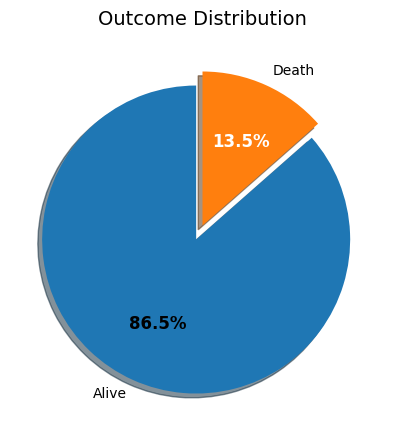

In [91]:
# check the distribution of the dependedendt variable : 

fig, ax = plt.subplots(figsize=(8,5), dpi=100)

patches, texts, autotexts = ax.pie(targetColumn['outcome'].value_counts(), autopct= '%1.1f%%', shadow=True, 
                                   startangle=90, explode=(0.1, 0), labels=['Alive','Death'])

plt.setp(autotexts, size=12, color = 'black', weight='bold')
autotexts[1].set_color('white');

plt.title('Outcome Distribution', fontsize=14)
plt.show()

In [97]:
dataset[['outcome']]= targetColumn.values
dataset

group      ID  outcome  age  gendera        BMI  hypertensive  \
0         1  125047      0.0   72        1  37.588179             0   
1         1  139812      0.0   75        2  30.188278             0   
2         1  109787      0.0   83        2  26.572634             0   
3         1  130587      0.0   43        2  83.264629             0   
4         1  138290      0.0   75        2  31.824842             1   
...     ...     ...      ...  ...      ...        ...           ...   
1172      2  171130      0.0   62        1  25.516870             1   
1173      2  101659      0.0   78        1  25.822710             0   
1174      2  162069      0.0   85        2  23.891779             1   
1175      2  120967      0.0   79        2  35.288554             0   
1176      2  107636      0.0   47        1  23.121384             1   

      atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                      0               0         1  ...    138.750000   
1                      0               0         0  ...    138.888889   
2                      0               0         0  ...    140.714286   
3                      0               0         0  ...    138.500000   
4                      0               0         0  ...    136.666667   
...                  ...             ...       ...  ...           ...   
1172                   1               0         1  ...    136.714286   
1173                   1               0         1  ...    135.680000   
1174                   1               0         1  ...    136.000000   
1175                   0               1         1  ...    140.000000   
1176                   0               0         1  ...    135.285714   

      Blood calcium    Chloride  Anion gap  Magnesium ion        PH  \
0          7.463636  109.166667  13.166667       2.618182  7.230000   
1          8.162500   98.444444  11.444444       1.887500  7.225000   
2          8.266667  105.857143  10.000000       2.157143  7.268000   
3          9.476923   92.071429  12.357143       1.942857  7.370000   
4          8.733333  104.500000  15.166667       1.650000  7.250000   
...             ...         ...        ...            ...       ...   
1172      10.271429   94.428571  20.142857       2.714286  7.378532   
1173      10.523529  101.720000  18.160000       2.012500  7.378532   
1174       8.466667   97.285714  14.000000       2.028571  7.378532   
1175       8.183333  104.000000  15.750000       2.090000  7.378532   
1176       9.085714   93.857143  20.285714       2.566667  7.378532   

      Bicarbonate  Lactic acid       PCO2  EF  
0       21.166667     0.500000  40.000000  55  
1       33.444444     0.500000  78.000000  55  
2       30.571429     0.500000  71.500000  35  
3       38.571429     0.600000  75.000000  55  
4       22.000000     0.600000  50.000000  55  
...           ...          ...        ...  ..  
1172    27.714286     1.853426  45.535382  40  
1173    20.480000     1.853426  45.535382  30  
1174    28.857143     1.853426  45.535382  55  
1175    24.375000     1.853426  45.535382  25  
1176    26.571429     1.853426  45.535382  55  

[1177 rows x 51 columns]

In [98]:
import plotly.express as px
fig = px.histogram(dataset, x="age", color="outcome", marginal="box", hover_data=dataset.columns)
fig.show()

In [99]:
fig = px.histogram(dataset, x="BMI", color="outcome", marginal="box", hover_data=dataset.columns)
fig.show()

In [100]:
fig = px.histogram(dataset, x="SP O2", color="outcome", marginal="box", hover_data=dataset.columns)
fig.show()

In [101]:
fig = px.histogram(dataset, x="heart rate", color="outcome", marginal="box", hover_data=dataset.columns)
fig.show()

In [102]:
dataset['gendera'].value_counts()

gendera
2    618
1    559
Name: count, dtype: int64

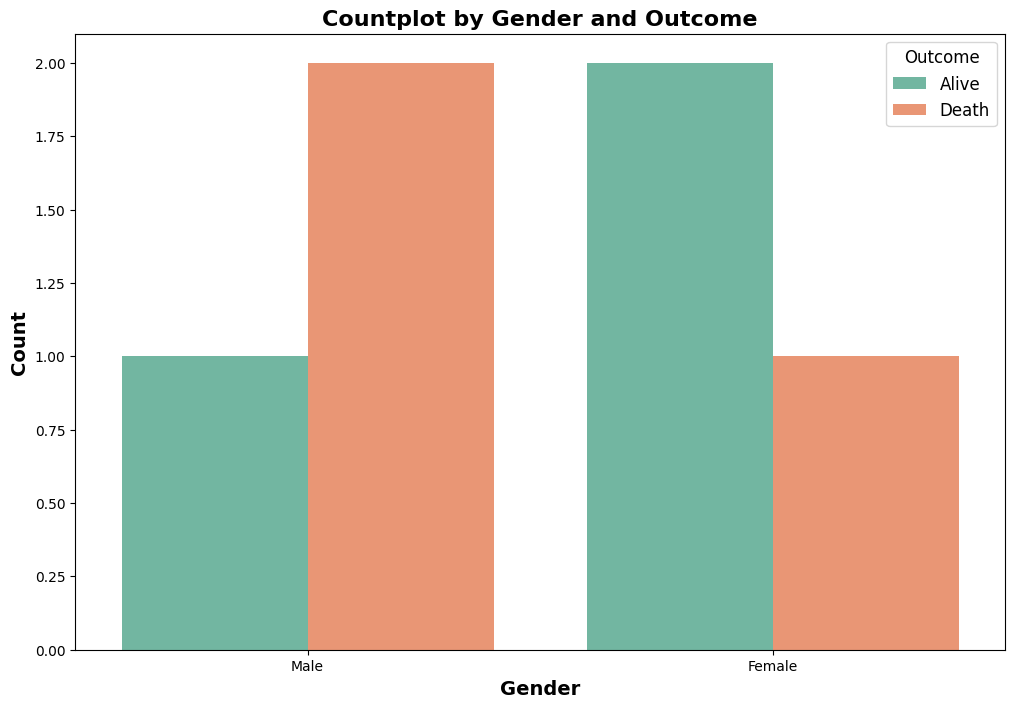

In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = {'gendera': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
        'outcome': ['Alive', 'Alive', 'Death', 'Alive', 'Death', 'Death']}
df = pd.DataFrame(data)

# Reshape the data into long-form format
df_long = df.melt(id_vars=['gendera'], value_vars=['outcome'], var_name='Outcome', value_name='Count')

# Create the countplot with hue
plt.figure(figsize=(12, 8))
plot = sns.countplot(data=df_long, x='gendera', hue='Count', palette='Set2')
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.title('Countplot by Gender and Outcome', fontsize=16, weight='bold')
plt.legend(title='Outcome', fontsize=12, title_fontsize=12, loc='upper right')
plt.show()


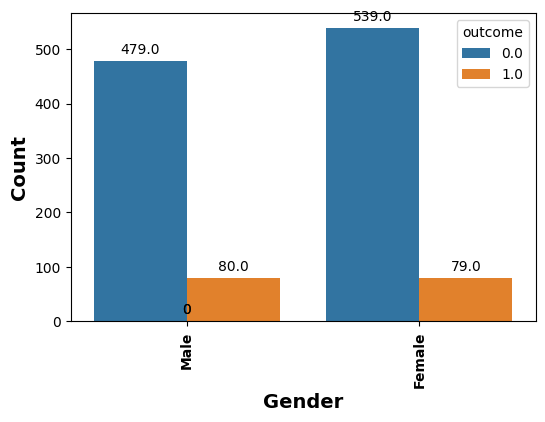

In [107]:
plt.figure(figsize=(6,4))
plot = sns.countplot(data= dataset, x = 'gendera', hue='outcome')
plt.xlabel('Gender', fontsize=14, weight='bold')
plt.ylabel('Count', fontsize=14, weight='bold')
plt.xticks(np.arange(2), ['Male', 'Female'], rotation='vertical', weight='bold')

for i in plot.patches:
  plot.annotate(format(i.get_height()),
                (i.get_x() + i.get_width()/2,
                 i.get_height()), ha='center', va='center',
                size=10, xytext=(0,8),
                textcoords='offset points') 

plt.show()

### Correlation

In [110]:
col = ['group', 'gendera', 'hypertensive','atrialfibrillation', 'CHD with no MI', 'diabetes', 'deficiencyanemias',
       'depression', 'Hyperlipemia', 'Renal failure', 'COPD', 'outcome']

In [111]:
corr = dataset[col].corr()

<Axes: >

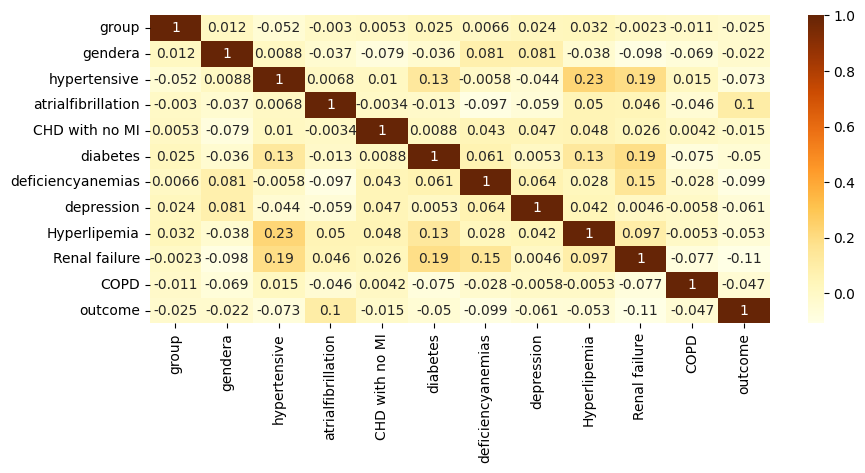

In [113]:
plt.figure(figsize=(10,4))
sns.heatmap(corr, annot=True, cmap='YlOrBr')

#### Distribution of Continuous var

<Axes: ylabel='Density'>

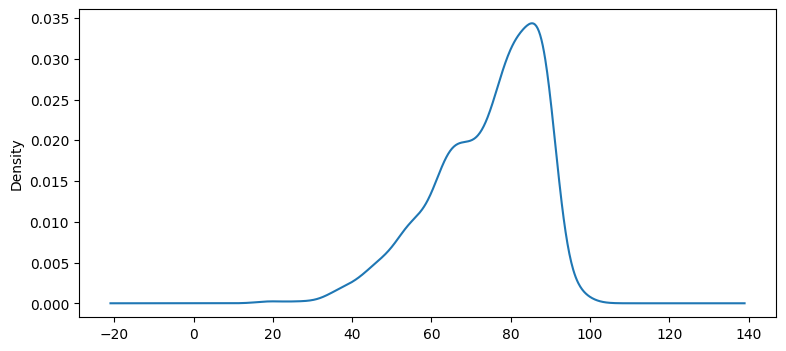

In [114]:
plt.figure(figsize=(9,4))
dataset['age'].plot(kind='kde')

<Axes: ylabel='Density'>

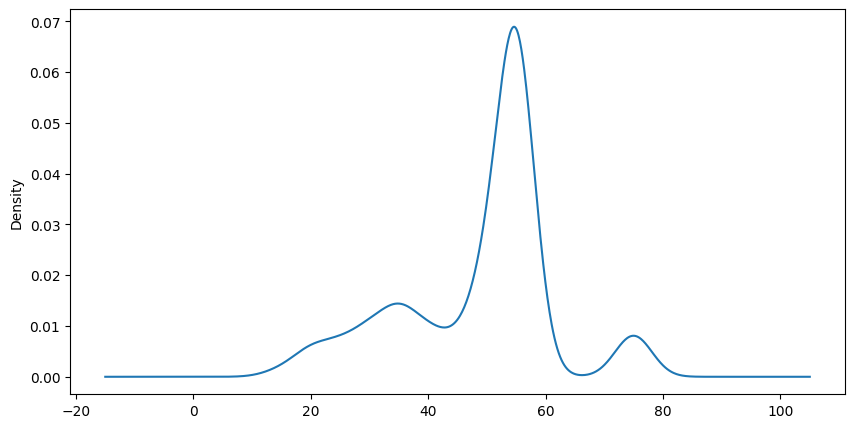

In [115]:
plt.figure(figsize=(10,5))
dataset['EF'].plot(kind='kde')

<Axes: ylabel='Density'>

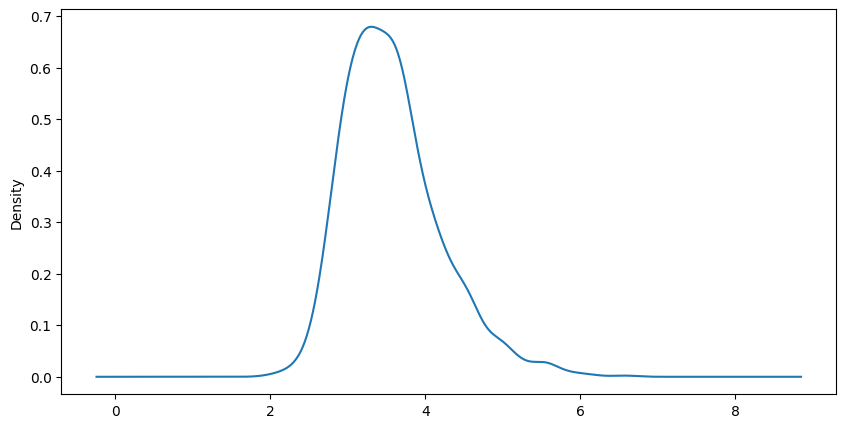

In [116]:
plt.figure(figsize=(10,5))
dataset['RBC'].plot(kind='kde')

<Axes: ylabel='Density'>

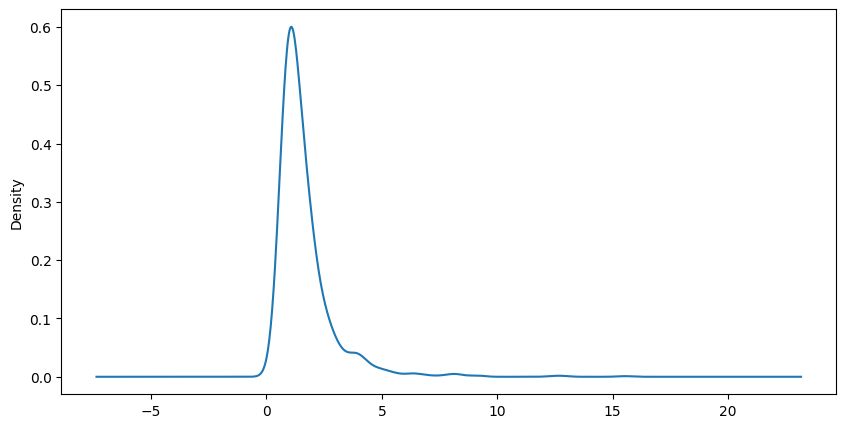

In [117]:
plt.figure(figsize=(10,5))
dataset['Creatinine'].plot(kind='kde')

<Axes: ylabel='Density'>

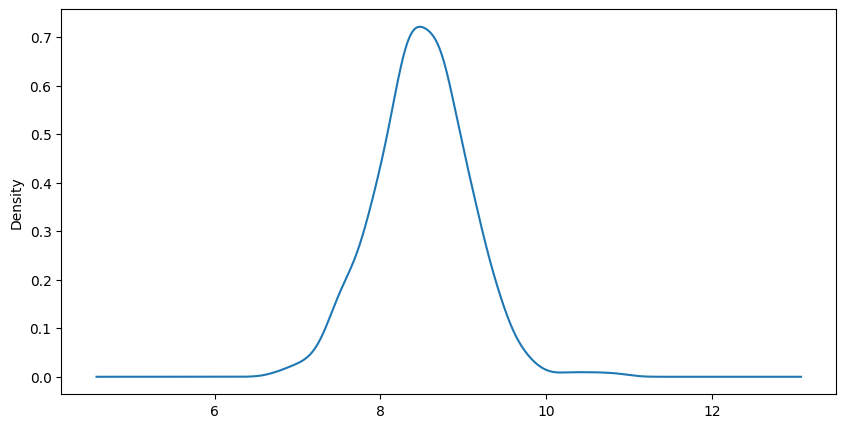

In [118]:
plt.figure(figsize=(10,5))
dataset['Blood calcium'].plot(kind='kde')

In [119]:
dataset.head()

group      ID  outcome  age  gendera        BMI  hypertensive  \
0      1  125047      0.0   72        1  37.588179             0   
1      1  139812      0.0   75        2  30.188278             0   
2      1  109787      0.0   83        2  26.572634             0   
3      1  130587      0.0   43        2  83.264629             0   
4      1  138290      0.0   75        2  31.824842             1   

   atrialfibrillation  CHD with no MI  diabetes  ...  Blood sodium  \
0                   0               0         1  ...    138.750000   
1                   0               0         0  ...    138.888889   
2                   0               0         0  ...    140.714286   
3                   0               0         0  ...    138.500000   
4                   0               0         0  ...    136.666667   

   Blood calcium    Chloride  Anion gap  Magnesium ion     PH  Bicarbonate  \
0       7.463636  109.166667  13.166667       2.618182  7.230    21.166667   
1       8.162500   98.444444  11.444444       1.887500  7.225    33.444444   
2       8.266667  105.857143  10.000000       2.157143  7.268    30.571429   
3       9.476923   92.071429  12.357143       1.942857  7.370    38.571429   
4       8.733333  104.500000  15.166667       1.650000  7.250    22.000000   

   Lactic acid  PCO2  EF  
0          0.5  40.0  55  
1          0.5  78.0  55  
2          0.5  71.5  35  
3          0.6  75.0  55  
4          0.6  50.0  55  

[5 rows x 51 columns]

## Data Preprocessing

### Splitting our data

In [121]:
# we will use the targetColumn and PredColumns 
x = predColumn
y = targetColumn

### Standardizing our data

In [122]:
from sklearn.preprocessing import StandardScaler

In [123]:
scale= StandardScaler()

In [124]:
scaled= scale.fit_transform(x)

In [127]:
xScaled= pd.DataFrame(scaled,columns= x.columns)

In [128]:
xScaled.head()

group        ID       age   gendera       BMI  hypertensive  \
0 -0.653197 -0.886597 -0.153051 -1.051449  0.793883     -1.595362   
1 -0.653197 -0.377851  0.070357  0.951068       NaN     -1.595362   
2 -0.653197 -1.412399  0.666111  0.951068 -0.387897     -1.595362   
3 -0.653197 -0.695710 -2.312661  0.951068  5.694186     -1.595362   
4 -0.653197 -0.430293  0.070357  0.951068  0.175575      0.626817   

   atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  ...  \
0           -0.906632       -0.306376  1.171744           1.396379  ...   
1           -0.906632       -0.306376 -0.853429           1.396379  ...   
2           -0.906632       -0.306376 -0.853429           1.396379  ...   
3           -0.906632       -0.306376 -0.853429          -0.716138  ...   
4           -0.906632       -0.306376 -0.853429           1.396379  ...   

   Blood sodium  Blood calcium  Chloride  Anion gap  Magnesium ion        PH  \
0     -0.033742      -1.813327  1.289532  -0.286026       1.980755 -2.207593   
1     -0.000272      -0.591578 -0.719329  -0.935527      -0.925400 -2.281907   
2      0.439627      -0.409475  0.669477  -1.480271       0.147056 -1.642809   
3     -0.093989       1.706287 -1.913344  -0.591321      -0.705227 -0.126810   
4     -0.535801       0.406349  0.415209   0.468234      -1.870013 -1.910338   

   Bicarbonate  Lactic acid      PCO2        EF  
0    -1.112245    -1.376411 -0.435717  0.488583  
1     1.264720    -1.376411  2.555450  0.488583  
2     0.708507    -1.376411  2.043803 -1.066269  
3     2.257299    -1.274713  2.319305  0.488583  
4    -0.950913    -1.274713  0.351432  0.488583  

[5 rows x 50 columns]

In [129]:
y.head()

outcome
0      0.0
1      0.0
2      0.0
3      0.0
4      0.0

In [130]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(xScaled,y, test_size=0.3, random_state=123)

In [ ]:
print(x_train.shape, x_test.shape)

In [131]:
x_train.drop(columns = 'ID', inplace=True)
x_test.drop(columns='ID', inplace=True)

In [132]:
x_train.head()

group       age   gendera       BMI  hypertensive  \
1011  1.530931  0.666111  0.951068 -0.972063      0.626817   
431  -0.653197 -1.791376 -1.051449  0.925017     -1.595362   
102  -0.653197 -0.153051  0.951068  0.633023      0.626817   
308  -0.653197 -0.450928 -1.051449  0.226171      0.626817   
548  -0.653197  1.261865  0.951068       NaN     -1.595362   

      atrialfibrillation  CHD with no MI  diabetes  deficiencyanemias  \
1011           -0.906632       -0.306376 -0.853429          -0.716138   
431            -0.906632       -0.306376  1.171744          -0.716138   
102             1.102983       -0.306376  1.171744           1.396379   
308            -0.906632       -0.306376  1.171744           1.396379   
548            -0.906632       -0.306376 -0.853429          -0.716138   

      depression  ...  Blood sodium  Blood calcium  Chloride  Anion gap  \
1011    -0.36743  ...     -0.776789      -2.208657  0.675424   0.070153   
431     -0.36743  ...      0.628975       0.435485  0.321532  -0.863149   
102     -0.36743  ...      1.097563       0.632157  1.341575   0.153959   
308     -0.36743  ...     -0.713673      -0.589592 -0.307445  -0.779886   
548     -0.36743  ...      0.862875      -0.361485  1.280348   0.649405   

      Magnesium ion        PH  Bicarbonate  Lactic acid      PCO2        EF  
1011      -1.124266 -1.736940    -1.402644     0.174488 -0.120858  0.488583  
431       -0.358632 -0.787376     0.668279     0.021941  0.771245 -0.677556  
102       -1.024833  0.393386    -0.628248    -0.817071 -0.435717  0.488583  
308       -0.447357  0.319072     0.086225    -0.325529  0.154645  0.488583  
548        1.089580  0.715412    -1.019242     0.555857 -0.992344 -2.232407  

[5 rows x 49 columns]

## Model Development using ML

### We will use the XG Boost Classifier model 

In [133]:
from xgboost import XGBClassifier, plot_tree, plot_importance

In [134]:
xgb = XGBClassifier(random_state=36)

In [135]:
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=36, ...)

In [136]:
pred = xgb.predict(x_test)

In [137]:
pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

In [138]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [139]:
cf = confusion_matrix(y_test, pred)

In [140]:
cf

array([[294,   7],
       [ 33,  20]], dtype=int64)

In [141]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.90      0.98      0.94       301
         1.0       0.74      0.38      0.50        53

    accuracy                           0.89       354
   macro avg       0.82      0.68      0.72       354
weighted avg       0.88      0.89      0.87       354



### Comparing Values

In [142]:
combine = np.concatenate((y_test.values.reshape(len(y_test),1), pred.reshape(len(pred),1)),1)

In [143]:
combine_result = pd.DataFrame(combine,  columns=['y_test', 'y_pred'])

In [144]:
combine_result

y_test  y_pred
0       0.0     0.0
1       0.0     0.0
2       0.0     0.0
3       0.0     0.0
4       0.0     0.0
..      ...     ...
349     1.0     1.0
350     0.0     0.0
351     0.0     0.0
352     0.0     0.0
353     1.0     0.0

[354 rows x 2 columns]

#### Plotting ROC and Accuracy Curve

In [151]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_true = y_test.values.reshape(len(y_test),1)
y_scores = pred.reshape(len(pred),1)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)


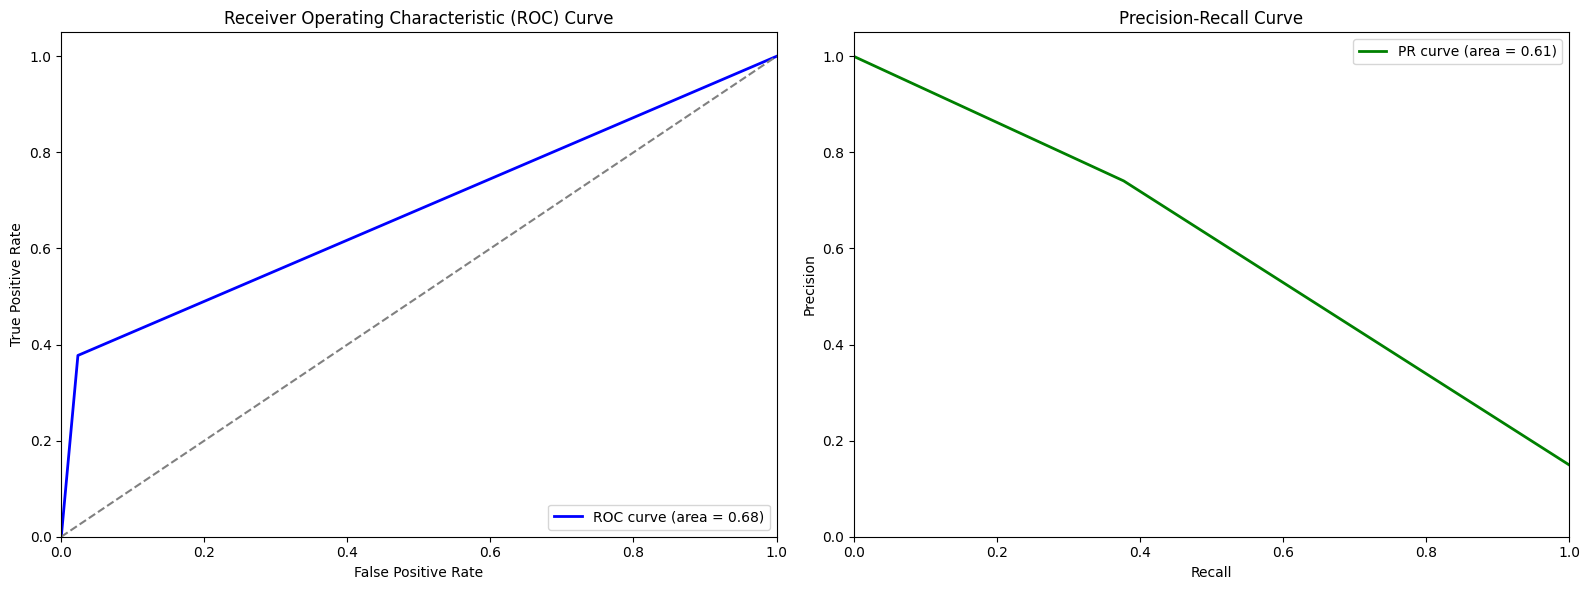

In [152]:
# Create a 1 by 2 plot
plt.figure(figsize=(16, 6))

# Plot ROC curve (left subplot)
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot precision-recall curve (right subplot)
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'PR curve (area = {pr_auc:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')

plt.tight_layout()  # Adjust subplots to avoid overlap
plt.show()

## Using Auto ML

### Using PyCaret
- PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within minutes in your choice of notebook environment.

### Installing Pycaret

In [ ]:
df= pd.read_csv("mortality.csv")

In [ ]:
from pycaret.classification import *

In [ ]:
df.head()

In [ ]:
model= setup(data= df, target= 'outcome')

In [ ]:
compare_models()

In [ ]:
ridge= create_model('ridge')

In [ ]:
pred = predict_model(ridge,data= x_test)

In [ ]:
pred